# CNO Neutrino Interaction Generator

In [9]:
import matplotlib.pyplot as plt
# import matplotlib.figure as fig
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from random import random

Start by defining the formula for the differential neutrino-electron scattering cross section.
Also define t_max, which is the maximum energy the scattered electron can have given a certain neutrino energy. 

See Giunti, Kim "Fundamentals of Neutrino Physics and Astrophysics", eq. 5.25.

In [10]:
g1 = 0.73
g2 = 0.23
sigma0 = 88.06 #e-46 # cm^2
me = 0.511 # MeV, electron mass
# e_nu = 1.5 # MeV, neutrino energy

def xsec(te, enu):
    '''
    te is electron kinetic energy
    enu is neutrino energy
    '''
    return (sigma0 / me) * (g1**2 + g2**2 * (1 - te/enu)**2 - g1 * g2 * (me * te) / (enu**2))

def t_max(enu):
    '''
    returns the maximum allowed electron kinetic
    energy for a neutrino with energy enu
    '''
    return (2 * enu**2) / (me + 2 * enu)

## Differential neutrino-electron scattering cross section

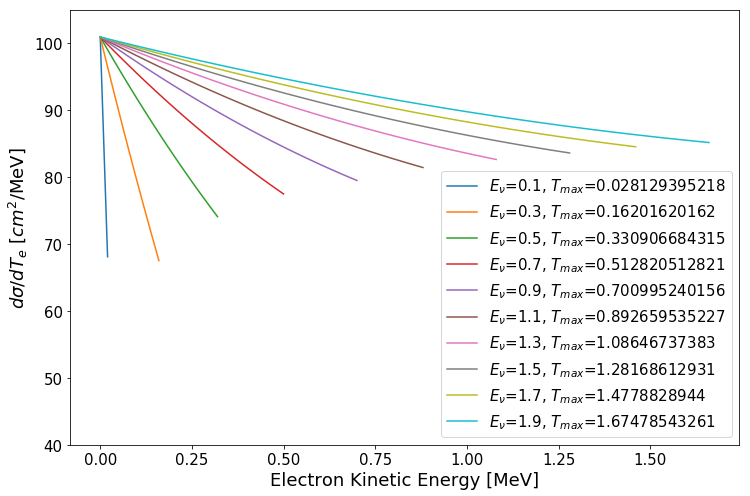

In [14]:
fig = plt.figure(figsize=(12,8),facecolor='w')
ax = fig.add_subplot(1,1,1)

for enu in np.arange(0.1, 2.0, 0.2):
    t = np.arange(0.0, t_max(enu), 0.02)
    plt.plot(t, xsec(t, enu), label=r'$E_\nu$='+str(enu)+', $T_{max}$='+str(t_max(enu)))
    
ax.legend(numpoints=1, loc='upper left')
leg=plt.legend(fontsize=15,loc=0)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')
plt.ylabel(r'$d\sigma/dT_e$ [$cm^2$/MeV]',fontsize=18)
plt.xlabel(r'Electron Kinetic Energy [MeV]',fontsize=18)
plt.tick_params(labelsize=15)
plt.ylim(40,105)
plt.show()

# Solar neutrino flux

In [15]:
def flux(x):
    '''
    x is neutrino energy
    *** IMPLEMENT FLUX FUNCTION HERE ***
    '''
    return -x + 1.5

Find the maximum value of the flux. This is only needed for the generation of random values distributed following the flux spectrum.

In [16]:
from scipy.optimize import fminbound
def minus_flux(x): return -flux(x)
max_flux = fminbound(minus_flux, 0, 1.5)

# Random engines
The two following functions are random number generators that produce random number distributed according to the neutrino spectrum, and the electron spectrum.

In [17]:
def shoot_neutrino(e_max=1.5):
    
    no_exit = True
    
    while(True):
        proposed_energy = random() * e_max
        r = random()
        if r < flux(proposed_energy) / max_flux:
            return proposed_energy

In [18]:
def shoot_electron(enu):
    tmax= t_max(enu)
    
    no_exit = True
    
    while(True):
        proposed_energy = random() * tmax
        r = random()
        if r < xsec(proposed_energy, enu) / xsec(0., enu):
            return proposed_energy

# Sample generation
Generated "n_samples" events. First generate a neutrino. The neutrino energy is sampled from the neutrino flux energy spectrum. Once we have a neutrino, sample the electron energy, acording to the electron energy distribution.

"samples" will contain all the generated events.

In [20]:
n_tot_events = 500 # *** THIS HAS TO COME FROM (TOTAL_FLUX * TOTAL_Pee * TOTAL_CROSS_SECTION * N_TARGETS * TIME)
n_samples = 10000
samples = []
for i in xrange(0, n_samples):
    neutrino_energy = shoot_neutrino()
    electron_energy = shoot_electron(neutrino_energy)
    samples.append(electron_energy)

# Plot electron energy distribution of events

/Library/Python/2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


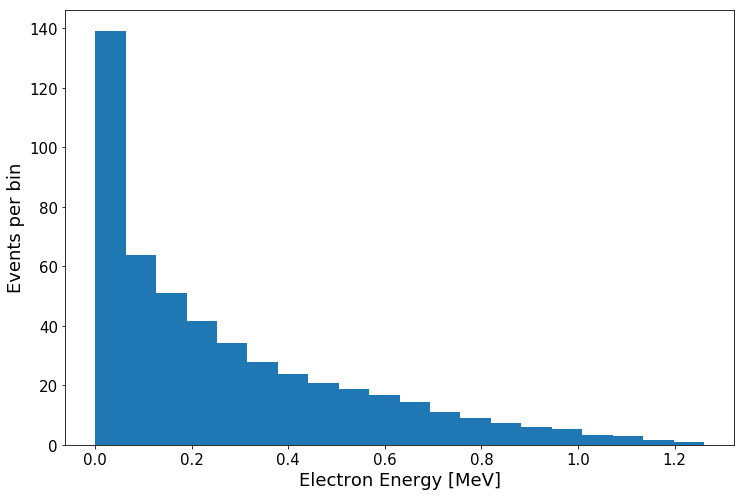

('Number of events in histogram =', 499.99999999999608)


In [21]:
plt.figure(figsize=(12,8),facecolor='w')
ax = fig.add_subplot(1,1,1)

scale = float(n_tot_events) / n_samples

n, bins, patches = plt.hist(samples, bins=20, weights=len(samples)*[scale])

plt.ylabel('Events per bin',fontsize=18)
plt.xlabel('Electron Energy [MeV]',fontsize=18)
plt.tick_params(labelsize=15)

plt.show()

print ('Number of events in histogram =', np.sum(n))